# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>. 

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='http://www.statsmodels.org/stable/tsa.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis</font></div>


### Perform standard imports and load the dataset
For these exercises we'll be using a statsmodels built-in macroeconomics dataset:

<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    
<div class="alert alert-info"><strong>NOTE:</strong> Although macrodata.csv file is present in the folder, you can also build this DataFrame with the following code:<br>
<tt>&nbsp;&nbsp;&nbsp;&nbsp;import pandas as pd<br>
&nbsp;&nbsp;&nbsp;&nbsp;import statsmodels.api as sm<br>
&nbsp;&nbsp;&nbsp;&nbsp;df = sm.datasets.macrodata.load_pandas().data<br>
&nbsp;&nbsp;&nbsp;&nbsp;df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))<br>
&nbsp;&nbsp;&nbsp;&nbsp;print(sm.datasets.macrodata.NOTE)</tt></div>

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Plot the dataset

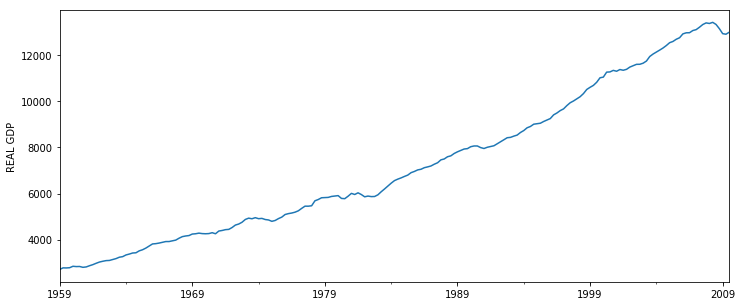

In [3]:
ax = df['realgdp'].plot(figsize=(12,5))
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

## Using Statsmodels to get the trend
<div class="alert alert-info"><h3>Related Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [5]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


We see from these numbers that for the period from <strong>1960-09-30</strong> to <strong>1965-06-30</strong> actual values fall below the trendline.

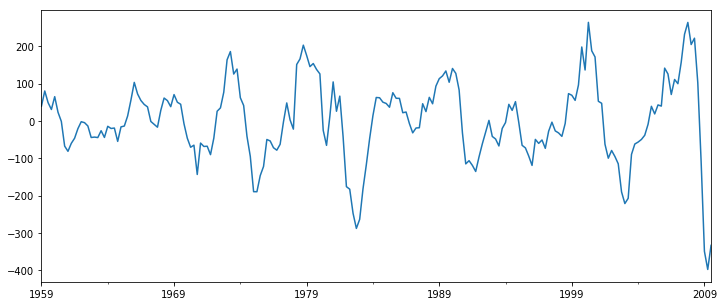

In [6]:
gdp_cycle.plot(figsize=(12,5))

In [7]:
gdp_trend

1959-03-31     2670.837085
1959-06-30     2698.712468
1959-09-30     2726.612545
1959-12-31     2754.612067
1960-03-31     2782.816333
1960-06-30     2811.349758
1960-09-30     2840.377312
1960-12-31     2870.078365
1961-03-31     2900.631438
1961-06-30     2932.172890
1961-09-30     2964.788224
1961-12-31     2998.525339
1962-03-31     3033.403153
1962-06-30     3069.427648
1962-09-30     3106.603457
1962-12-31     3144.932262
1963-03-31     3184.407274
1963-06-30     3224.993971
1963-09-30     3266.630758
1963-12-31     3309.228196
1964-03-31     3352.680412
1964-06-30     3396.853867
1964-09-30     3441.606001
1964-12-31     3486.781590
1965-03-31     3532.213445
1965-06-30     3577.700115
1965-09-30     3623.030172
1965-12-31     3667.983598
1966-03-31     3712.348663
1966-06-30     3755.948652
                  ...     
2002-06-30    11634.030035
2002-09-30    11711.228768
2002-12-31    11788.849905
2003-03-31    11867.044647
2003-06-30    11945.845428
2003-09-30    12025.146415
2

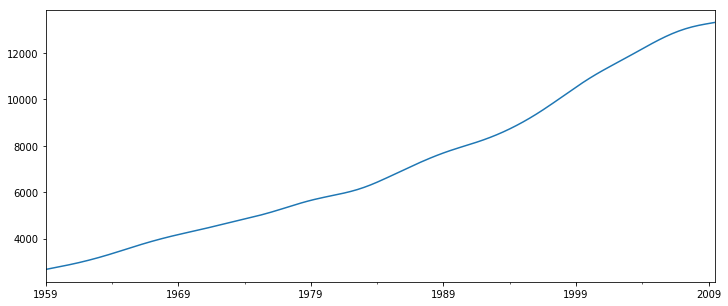

In [8]:
gdp_trend.plot(figsize=(12,5))

In [9]:
type(gdp_cycle)

pandas.core.series.Series

In [10]:
type(gdp_trend)

pandas.core.series.Series

In [11]:
df['trend'] = gdp_trend

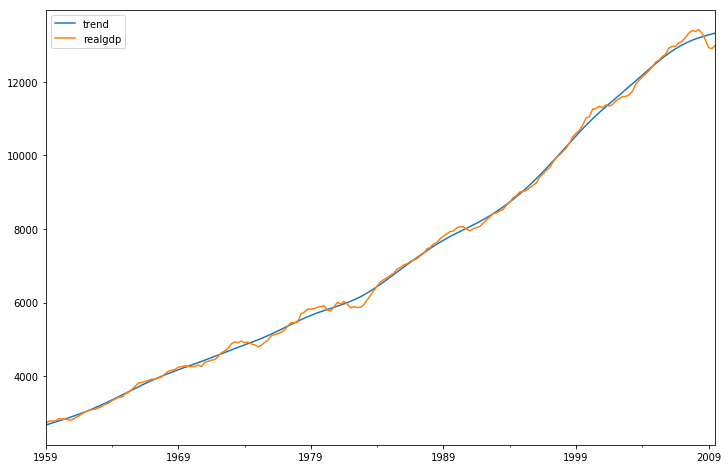

In [12]:
df[['trend','realgdp']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

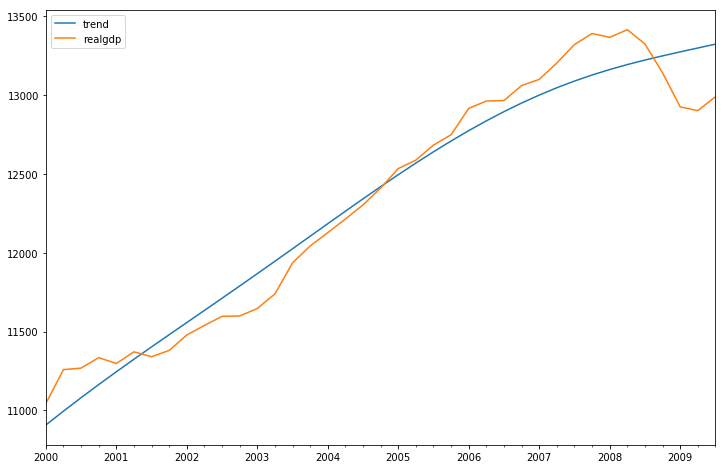

In [13]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

In [14]:
df['cycle'] = gdp_cycle

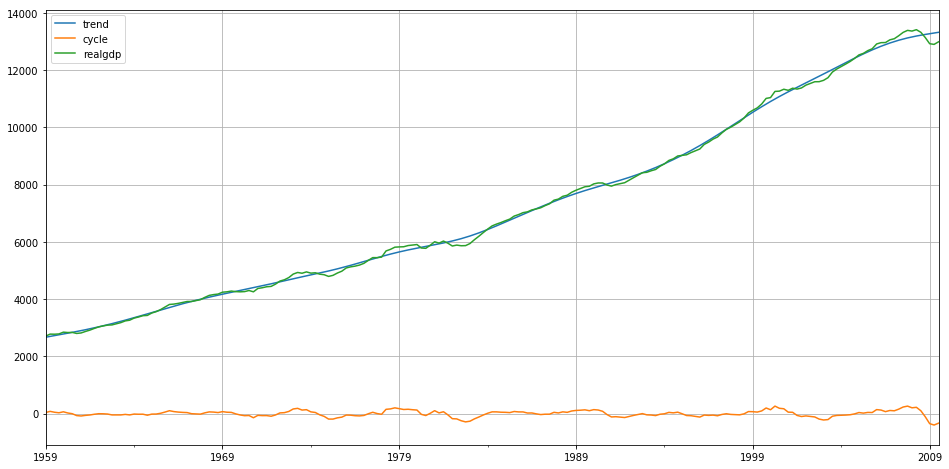

In [15]:
df[['trend','cycle','realgdp']].plot(figsize=(16,8), grid=1).autoscale(axis='x',tight=True);

### Notice that cyclic component makes the realgdp flicker around the trend component.

In [16]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend,cycle
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085,39.511915
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468,80.088532
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545,48.875455
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067,30.591933
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333,64.882667
1960-06-30,1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55,2811.349758,23.040242
1960-09-30,1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34,2840.377312,-1.355312
1960-12-31,1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08,2870.078365,-67.462365
1961-03-31,1961,1,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77,2900.631438,-81.367438
1961-06-30,1961,2,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81,2932.172890,-60.167890
